In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_random_number_for_right_deck(n):
    ''' Generate random number for right deck
        Args:
            n : size of deck
        Returns:
            A random number between 0 and n including 0 and n
            Raise ValueError if n is negative or zero
        #For testing call
            get_random_number_for_right_deck(10)
    '''
    if n>0:
        return np.random.randint(0,n+1)
    else:
        raise ValueError("deck size cannot be less than or equal to zero")

def should_drop_from_right_deck(n_left, n_right):
    ''' Method for finding from which deck to drop
        Args:
            n_left : size of left deck
            n_right: size of right deck
        Return:
            Boolean value indicating it should drop from right deck or not
            Raise ValueError if n_left of n_right is negative
        #For testing call
            should_drop_from_right_deck(2,5)
    '''
    if n_left >= 0 and n_right >= 0:
        if n_right==0:
            return False
        elif n_left==0:
            return True
        else:
            randint=np.random.randint(1,n_left+n_right)
            return randint%2==0
    else:
        raise ValueError("n_left or n_right cannot be negative")

def shuffle(cards,get_random_number_for_right_deck,should_drop_from_right_deck):
    ''' shuffle method
        Args:
            cards                            : list containg cards
            get_random_number_for_right_deck : passing function which return size of right deck
            should_drop_from_right_deck      : passing function which return boolean value indicating cards should drop from right deck
        Returns:
            list of shuffled cards
        #For testing Call
            cards=np.arange(1,53)
            shuffle(cards,get_random_number_for_right_deck,should_drop_from_right_deck)
    '''
    n=len(cards)
    n_right=get_random_number_for_right_deck(n)
    n_left=n-n_right
    leftIndex=-(n)
    shuffledCards=[]
    for i in range(n):
        if(should_drop_from_right_deck(n_left, n_right)):
            rightIndex=n-n_right
            shuffledCards.append(cards[rightIndex])
            n_right-=1
        elif n_left!=0:
            shuffledCards.append(cards[leftIndex])
            n_left-=1
            leftIndex+=1
    return np.array(shuffledCards)

#implenting Gibert shannon reeds model
def GSR_get_right(n):
    ''' Generate random number for right deck using Gilbert-Shannon-Reeds model
        Args:
            n : size of deck
        Returns:
            A random number between 0 and n including 0 and n
            Raise ValueError if n is negative or zero
        #For testing call
            GSR_get_right(10)
    '''
    if n>0:
        return np.random.binomial(n,p=0.5)
    else:
        raise ValueError("deck size cannot be less than or equal to zero")    
    
def GSR_drop_right(n_left,n_right):
    ''' Method for finding from which deck to drop using Gilbert-Shannon-Reeds model
        Args:
            n_left : size of left deck
            n_right: size of right deck
        Return:
            Boolean value indicating it should drop from right deck or not
            Raise ValueError if n_left of n_right is negative
        #For testing call
            GSR_drop_right(10)
    '''
    if n_left >= 0 and n_right >= 0:
        if n_right==0:
            return False
        elif n_left==0:
            return True
        else:
            randint=np.random.binomial(n=1,p=n_right/(n_left+n_right))
            return randint==0
    else:
        raise ValueError("n_left or n_right cannot be negative")

'''
#For testing GSR Shuffle call
GSRShuffledCards=shuffle(cards,GSR_get_right,GSR_drop_right)
'''

'\n#For testing GSR Shuffle call\nGSRShuffledCards=shuffle(cards,GSR_get_right,GSR_drop_right)\n'

In [2]:
#below functions used for calculating errors for checking randomness in shuffles
def compare(seq1,seq2):
    ''' Compare two list for checking overlapping values
        Args:
            seq1 : list of first seqence
            seq2 : list of second seqence
        Returns:
            number of common elements in seq1 and seq2
    '''
    s1=set(seq1)
    s2=set(seq2)
    result=s1.intersection(s2)
    return len(result)

def overlappingError(seq1,seq2,div):
    '''Calculating overlapping Error
        Args:
            seq1 : list of first sequence
            seq2 : list of second sequence
            div  : division on how many overlapping size to fix, i.e overlapping 5 values
        Returns:
            overlapping error
            Raises ValueError if size of seqence is not same
        #For testing call
            overlappingError(cards,GSRShuffledCards,5)
    '''
    l1=len(seq1)
    l2=len(seq2)
    overlappingError=0
    if l1== l2:
        if l1<=div:
            return np.square(l1)
        for i in range(l1):
            for j in range(l2):
                if i + div > l1:
                    break
                c1=sorted(seq1[i:i+div-1])
                if j+div >l2:
                    break
                c2=sorted(seq2[j:j+div-1])
                overlappingError+=np.square(compare(c1,c2))
    else:
        raise ValueError("sizes of sequences cannot be different")
    return overlappingError

def calculateRandomNess(seq1,seq2):
    ''' calculate randomNess between two seqences
        Args:
            seq1 : list of first sequence
            seq2 : list of second sequence
        Returns:
            Value between 0 and 1 indicating randomness, where 1 being highest randomness and 0 being lowest randomness
        #For testing call
            calculateRandomNess(cards,GSRShuffledCards)
            calculateRandomNess(cards,cards) #output : 0 as both as same
    '''
    division=5 # checking for five overlapping sequence, i.e it can be any 5! combination
    overlapping5Error=overlappingError(seq1,seq2,division)
    max5Error = overlappingError(seq1,seq1,5)
    return 1-overlapping5Error/max5Error

In [3]:
def getRandomNessForShuffles(cards,shuffleSize):
    ''' Calling shuffle method using using Gilbert-Shannon-Reeds model for different shuffle size and 
        calculating randomness for each of the shuffle
        Args:
            cards: original deck
            shuffleSize: int of how many shuffle you have to perform
        Returns:
            pair of (NoOfshuffle,randomNess) indicating what is randomNess Value for each of successive shuffles
        
    '''
    NoOfshuffle=[]
    randomNess=[]
    GSRShuffledCards=shuffle(cards,GSR_get_right,GSR_drop_right)
    for i in range(shuffleSize):
        r=calculateRandomNess(cards,GSRShuffledCards)
        NoOfshuffle.append(i)
        randomNess.append(r)
        GSRShuffledCards=shuffle(GSRShuffledCards,GSR_get_right,GSR_drop_right)
    return NoOfshuffle,randomNess

def plotGraph(NoOfshuffle,randdomNess,shuffleSize,title,estimateShuffle):
    ''' plotting graph
        Args:
            NoOfshuffle:
            randdomNess:
            shuffleSize:
            title:
            estimateShuffle:
        Returns:
            graph with y axis as number of shuffles and x axis as randomness values
            and indicating optimal number of shuffles using Bayer & Diaconis estimation 3/2*log2(n)
    
    '''
    y_intrsct = [estimateShuffle -2, estimateShuffle -1, estimateShuffle,estimateShuffle +1,estimateShuffle+2]
    x_intrsct = np.interp(y_intrsct, NoOfshuffle, randdomNess)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(randdomNess,NoOfshuffle, color='r')
    ax.set_xlabel(xlabel='RandomNess', size=20)
    ax.set_ylabel(ylabel='NoOfShuffles', size=20) 
    ax.set_title(title)
    custom_ticks=np.arange(1,shuffleSize+1)
    ax.set_yticks(custom_ticks)

    ax.grid(axis='y')
    ax.vlines(x_intrsct, *ax.get_ylim())
    
    plt.show()

def checkingGSRImplementation(startDeckSize,n,shuffleSize):
    ''' implemets Gilbert-Shannon-Reeds model and plots graph for checking its implenting for 
        finding optimal no. of shuffles
        Args:
            startDeckSize: size of staring deck
            n            : it is no. of time startDeckSize muliply by 2 , i.e 26,52,104,208, so n here is 1,2,3,4
            shuffleSize  : number fo shuffles to perform
        
    '''
    decks=[]
    a=startDeckSize
    for i in range(n):
        decks.append(a)
        a*=2

    for i in range(len(decks)):
        cards=np.arange(1,decks[i]+1)
        NoOfshuffle,randdomNess = getRandomNessForShuffles(cards,shuffleSize)
        title='Deck of '+str(decks[i])
        estimateShuffle=1.5*np.log2(decks[i])
        plotGraph(NoOfshuffle,randdomNess,shuffleSize,title,estimateShuffle)
    

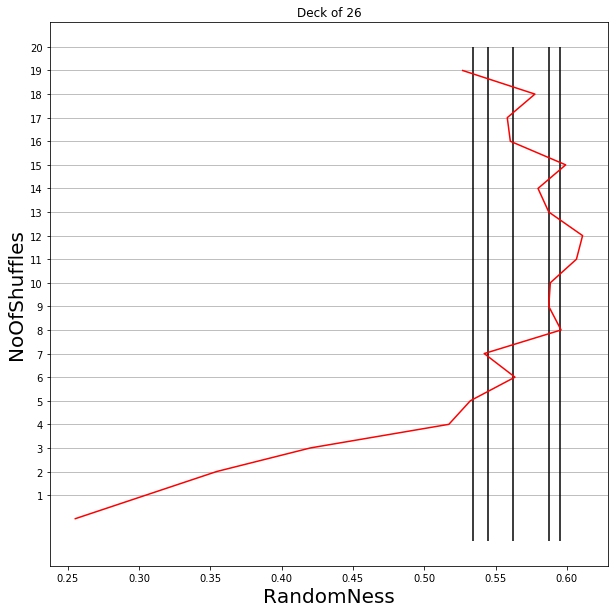

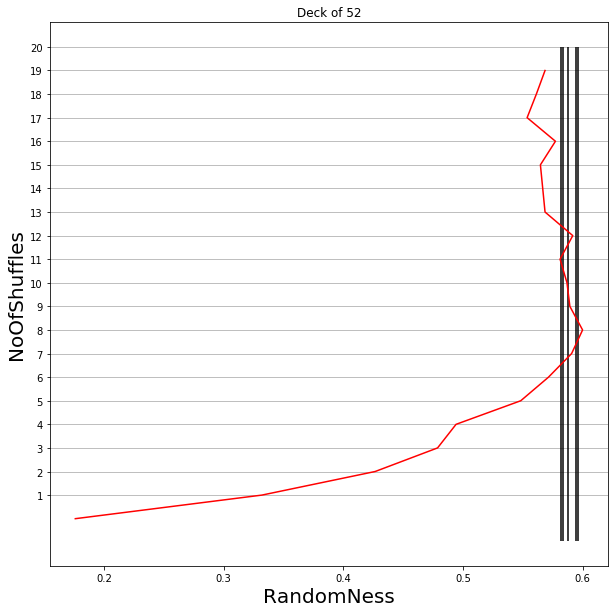

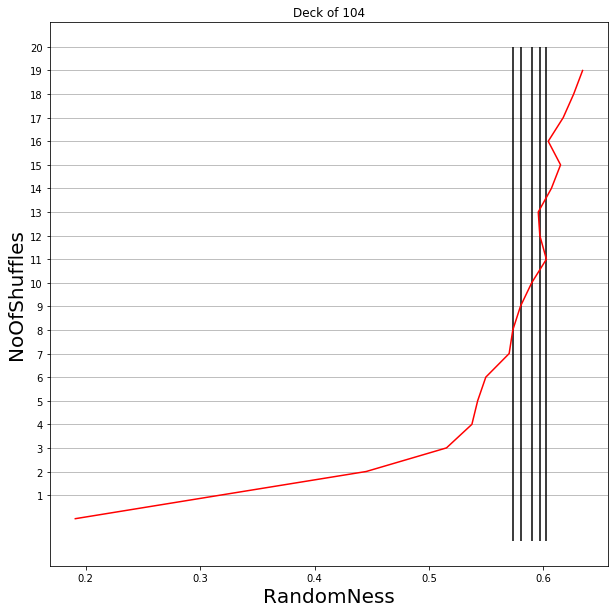

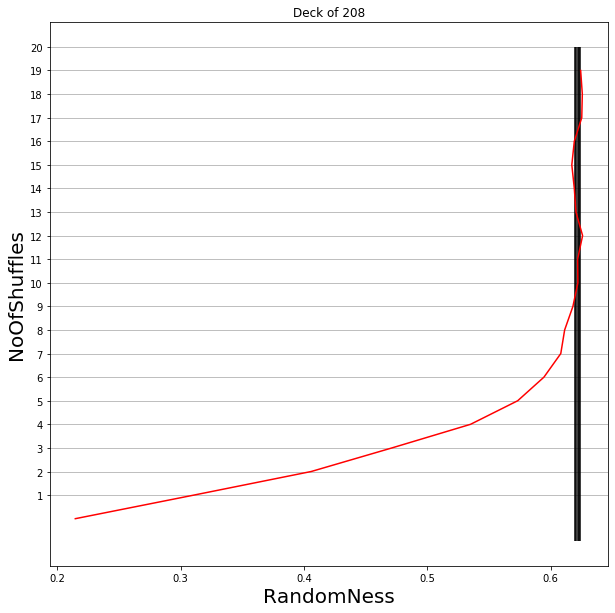

In [4]:
#for checking
checkingGSRImplementation(26,4,20)